In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Exploration**

In [2]:
# Load the Dataset (Dataset taken from Kaggle)
dataset = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
# Show the dataset
dataset

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
# Show the size of dataset
dataset.shape

(962, 2)

dataset includes 962 rows and 2 columns.

In [5]:
# Check is missing values
dataset.isnull().sum()

Category    0
Resume      0
dtype: int64

No missing values present.

**Exploring dataset columns**

**Exploring category**

In [6]:
dataset['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [7]:
# print the unique category values
dataset['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

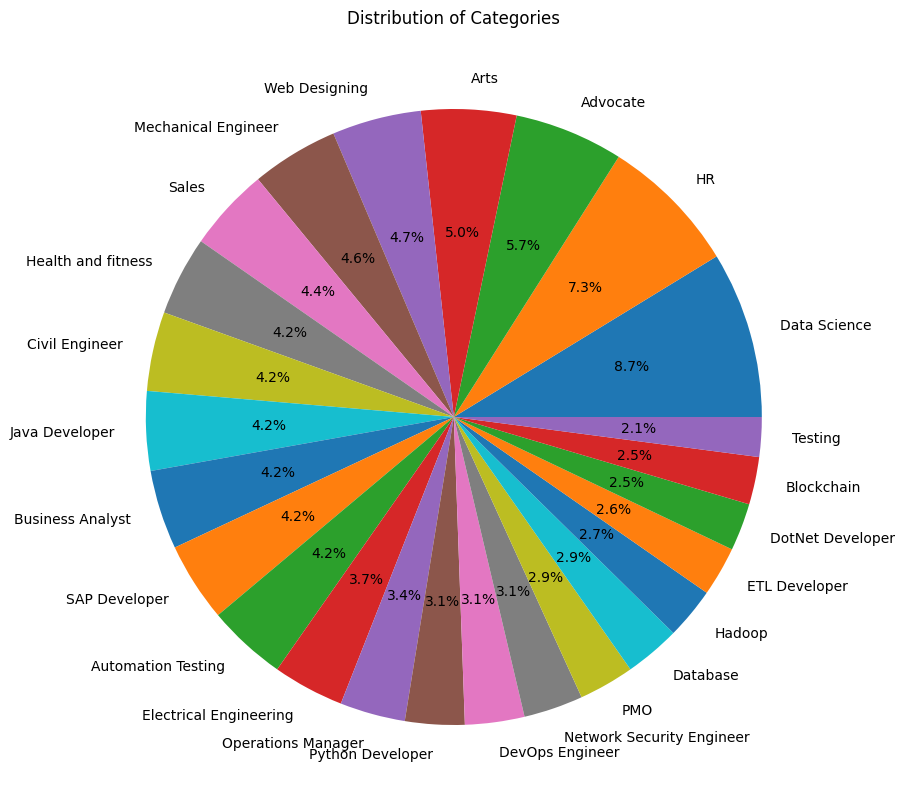

In [8]:
# Plot the Distribution of Category column
plt.figure(figsize = (15,10))
plt.pie(dataset['Category'].value_counts(), labels=dataset['Category'].unique(), autopct = '%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

**Exploring Resume**

In [9]:
# show the resume column 0th index means 1st row value
dataset['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [10]:
# show the category column 0th index means 1st row value
dataset['Category'][0]

'Data Science'

**Cleaning Resume text:**


In [11]:
# import regular expressions
import re
def CleanResume(text):
  CleanText = re.sub('http\S+\s', ' ', text)   # Remove URLs: Eliminate any hyperlinks present in the resume text.
  CleanText = re.sub('RT|cc', ' ', CleanText)   # Remove RT and cc: Filter out retweet and carbon copy indicators.
  CleanText = re.sub('#\S+\s', ' ', CleanText)   # Remove hashtags: Discard hashtags used in social media posts.
  CleanText = re.sub('@\S+', '  ', CleanText)   # Remove mentions: Exclude Twitter handles or usernames.
  CleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', CleanText)   # Remove special characters: Strip away any non-alphanumeric characters.
  CleanText = re.sub(r'[^\x00-\x7f]', ' ', CleanText)    # Remove non-ASCII characters: Ensure compatibility with text processing.
  CleanText = re.sub('\s+', ' ', CleanText)    # Remove extra whitespace: Normalize the text by removing excess spaces.
  return CleanText

In [12]:
# applying the CleanResume function to clean the 'Resume' column in the dataset using a lambda function.
dataset['Resume'] = dataset['Resume'].apply(lambda x: CleanResume(x))

In [13]:
# check the resume column 0th index text would be cleaned or not
dataset['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

**words into categorical values**

In [14]:
# Encoded the categorical labels with numerical values
from sklearn.preprocessing import LabelEncoder
lencode = LabelEncoder()

In [15]:
lencode.fit(dataset['Category'])
dataset['Category_en'] = lencode.transform(dataset['Category'])

In [16]:
dataset

,Category,Resume,Category_en
0,Data Science,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...,6
...,...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...,23
958,Testing,Willingness to a ept the challenges Positive ...,23
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...,23
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...,23


**TF-IDF Vectorization**

In [17]:
#TfidfVectorizer from scikit-learn to convert a collection of raw documents into a matrix of TF-IDF features. The TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is commonly used in text processing tasks for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [18]:
tfidf.fit(dataset['Resume'])
Requiredtext = tfidf.transform(dataset['Resume'])

**Train Test Splitting**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(Requiredtext , dataset['Category_en'], test_size = 0.2, random_state = 42)

In [21]:
X_train.shape

(769, 7351)

In [22]:
X_test.shape

(193, 7351)

**Train the model and print the Accuracy:**

In [23]:
# The K-nearest neighbors (KNN) algorithm is a supervised learning method used for classification and regression tasks.
from sklearn.neighbors import KNeighborsClassifier
# The One-vs-Rest (OvR) strategy is a technique for extending binary classifiers to multi-class classification problems.
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [24]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print('Trained Model Accuracy: {:.1%}'.format(accuracy_score(y_test, ypred)))

Trained Model Accuracy: 98.4%


**Prediction System**

In [25]:
# Saving the trained model and tfidf vectorization
import pickle as pckl
pckl.dump(tfidf, open('tfidf.pkl', 'wb'))
pckl.dump(clf, open('clf.pkl', 'wb'))

In [26]:
# Load the saved model and TF-IDF vectorizer
clf = pckl.load(open('clf.pkl','rb'))
tfidf = pckl.load(open('tfidf.pkl', 'rb'))  # Load TF-IDF vectorizer

# List of resumes to predict categories for
myresumes = [
    "Skill Set OS Windows XP/7/8/8.1/10 Database MYSQL, sql server 2005, 2008 & 2012 Languages Core Java Web Technology HTML, CSS Testing Manual Testing, Database Testing.",

    "Education Details MCA YMCAUST, Faridabad, Haryana Data Science internship Skill Details Data Structure- Exprience - Less than 1 year months C- Exprience - Less than 1 year months Data Analysis- Exprience - Less than 1 year months Python- Exprience - Less than 1 year months Core Java- Exprience - Less than 1 year months Database Management- Exprience - Less than 1 year monthsCompany Details company - Itechpower description."
]

# Initialize a list to store predicted categories
predicted_categories = []

for resume in myresumes:
    # Clean each resume individually
    cleaned_resume = CleanResume(resume)

    # Transform the cleaned resume using the trained TF-IDF vectorizer
    input_features = tfidf.transform([cleaned_resume])

    # Make the prediction using the loaded classifier
    prediction_id = clf.predict(input_features)[0]

    # Decode the predicted category ID
    category_name = lencode.inverse_transform(prediction_id.reshape(-1, 1))

    # Append the predicted category to the list
    predicted_categories.append(category_name)

# Print the predicted categories for each resume
for i, category in enumerate(predicted_categories):
    print("Predicted Category for resume", i+1, ":", category)


Predicted Category for resume 1 : ['Testing']
Predicted Category for resume 2 : ['Data Science']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Our trained model successfully classify the resumes correct category.